# Weather Vs Latitude
----


## Generate Cities List

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'Data/cities.csv"'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)





In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls



In [3]:
#set up list for each column in dataframe
City_name=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lng=[]
Lat=[]
Max_Temp = []
Wind_speed=[]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    #set base URL
    url = 'http://api.openweathermap.org/data/2.5/weather?'
    #set temp unit
    units = 'imperial'
    # Build query URL and request your results in Celsius
    query_url = f'{url}appid={api_key}&q={city}&units={units}'
    weather_json = requests.get(query_url).json()
    try:
        City_name.append(weather_json['name'])
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        Lng.append(weather_json['coord']['lon'])
        Lat.append(weather_json['coord']['lat'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Wind_speed.append(weather_json['wind']['speed'])
        print(f'{city} is found')
    except:
        print('>CITY NOT FOUND!!!<')
        

grand-santi is found
gedo is found
atuona is found
padang is found
east london is found
georgetown is found
khatanga is found
mataura is found
novikovo is found
port-gentil is found
butaritari is found
hobart is found
eyl is found
macheng is found
grand gaube is found
kawalu is found
peleduy is found
yellowknife is found
pevek is found
tasiilaq is found
cape town is found
bredasdorp is found
>CITY NOT FOUND!!!<
saint george is found
victoria is found
kapaa is found
ushuaia is found
punta arenas is found
nouadhibou is found
saskylakh is found
carnarvon is found
semey is found
redlands is found
duma is found
port alfred is found
ulaangom is found
zhurivka is found
rikitea is found
busselton is found
>CITY NOT FOUND!!!<
hemnesberget is found
clyde river is found
saint-philippe is found
praya is found
norman wells is found
santa maria la alta is found
luderitz is found
northam is found
guarapari is found
kundla is found
hovd is found
vardo is found
albany is found
udachnyy is found
mar del

storforshei is found
matara is found
iqaluit is found
malpe is found
>CITY NOT FOUND!!!<
loreto is found
>CITY NOT FOUND!!!<
aksu is found
>CITY NOT FOUND!!!<
nikolskoye is found
touros is found
baneh is found
gigmoto is found
karla is found
wichita falls is found
>CITY NOT FOUND!!!<
toucheng is found
shieli is found
kaspiyskiy is found
kundiawa is found
lieksa is found
kasongo-lunda is found
>CITY NOT FOUND!!!<
ridge is found
saint-leu is found
boende is found
fitjar is found
baltay is found
dudinka is found
puerto cabezas is found
cabra is found
>CITY NOT FOUND!!!<
toora-khem is found
gorontalo is found
parkes is found
paamiut is found
luena is found
peniche is found
dayong is found
kingisepp is found
inhambane is found
churapcha is found
nishihara is found
tampilisan is found
kailahun is found
pisco is found
>CITY NOT FOUND!!!<
south lake tahoe is found
las matas de farfan is found
goderich is found
aginskoye is found
kraliky is found
>CITY NOT FOUND!!!<
manoel urbano is found
jalu 

### Convert Raw Data to DataFrame

In [4]:
weather_dict = {
    'City': City_name,
    'Cloudiness': Cloudiness,
    'Country': Country,
    'Date': Date,
    'Humidity': Humidity,
    'Lng': Lng,
    'Lat': Lat,
    'Max Temp': Max_Temp,
    'Wind speed': Wind_speed 
}

weather_data = pd.DataFrame(weather_dict)

# Export file as a CSV, without the Pandas index, but with the header

weather_data.to_csv('Data/cities.csv', index=False, header=True)
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lng,Lat,Max Temp,Wind speed
0,Grand-Santi,100,GF,1548883571,86,-54.38,4.27,78.21,3.15
1,Gedo,0,ET,1548883571,50,37.45,9.01,49.86,4.16
2,Atuona,8,PF,1548883571,99,-139.03,-9.80,81.77,20.83
3,Padang,20,ID,1548878400,94,100.36,-0.92,77.00,1.12
4,East London,64,ZA,1548883572,99,27.91,-33.02,72.64,11.77
5,Georgetown,75,GY,1548882000,78,-58.16,6.80,80.60,13.87
6,Khatanga,36,RU,1548883573,0,102.47,71.98,-40.05,3.15
7,Mataura,0,NZ,1548883573,76,168.86,-46.19,74.89,4.61
8,Novikovo,48,UA,1548883574,100,34.56,45.05,34.11,2.71
9,Port-Gentil,40,GA,1548882000,94,8.78,-0.72,78.80,2.24


# Plotting the Data


#### Latitude vs. Temperature Plot

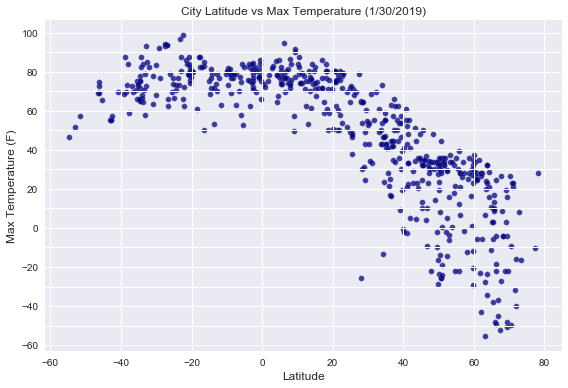

In [5]:

x = weather_data['Max Temp']

# plot chart
plt.style.use('seaborn')
plt.scatter(weather_data['Lat'], x, s = 30, color = 'darkblue', edgecolor = 'grey', alpha = .75)


# Reference lines
for i in list(np.arange(-50, 100, 10)):
    plt.axhline(i,linewidth=1, color='white')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='white')
    
#Titles
plt.xlabel('Latitude', size=12)
plt.ylabel('Max Temperature (F)',size=12)
plt.title('City Latitude vs Max Temperature (1/30/2019)',size =12)
plt.tight_layout()


plt.savefig('Images/max_temp.png')




#### Latitude vs. Humidity Plot

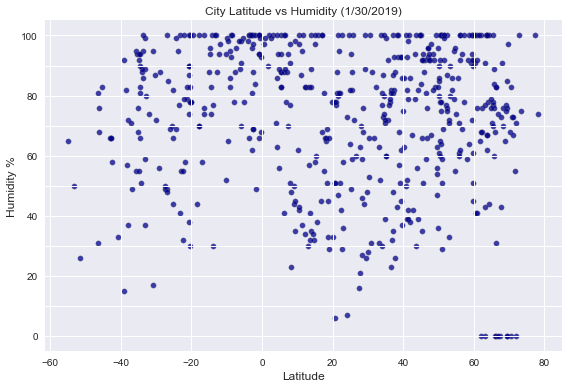

In [6]:

x = weather_data['Humidity']

#Plot chart
plt.style.use('seaborn')
plt.scatter(weather_data['Lat'], x, s = 30, color = 'darkblue', edgecolor = 'grey', alpha = .75)

# Reference lines
for i in list(np.arange(0, 100, 10)):
    plt.axhline(i,linewidth=1, color='white')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='white')
    
#Titles
plt.xlabel('Latitude',size=12)
plt.ylabel('Humidity %',size=12)
plt.title('City Latitude vs Humidity (1/30/2019)',size =12)
plt.tight_layout()

plt.savefig("Images/humidity.png")

#### Latitude vs. Cloudiness Plot

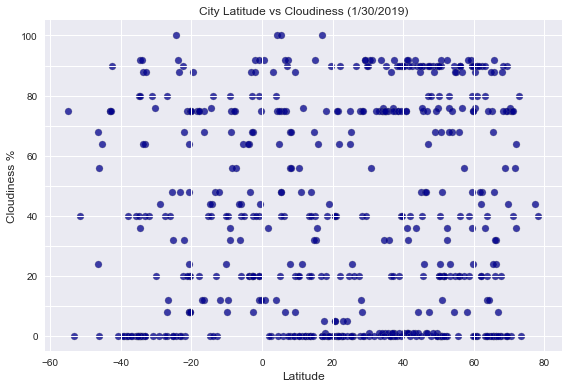

In [7]:

x = weather_data['Cloudiness']

#Plot chart
plt.style.use('seaborn')
plt.scatter(weather_data['Lat'], x, s = 50, color = 'darkblue', edgecolor = 'grey', alpha = .75)


# Reference lines
for i in list(np.arange(0, 100, 10)):
    plt.axhline(i,linewidth=1, color='white')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='white')
    
#Titles
plt.xlabel('Latitude',size=12)
plt.ylabel('Cloudiness %',size=12)
plt.title('City Latitude vs Cloudiness (1/30/2019)',size =12)
plt.tight_layout()

plt.savefig("Images/cloudiness.png")

#### Latitude vs. Wind Speed Plot

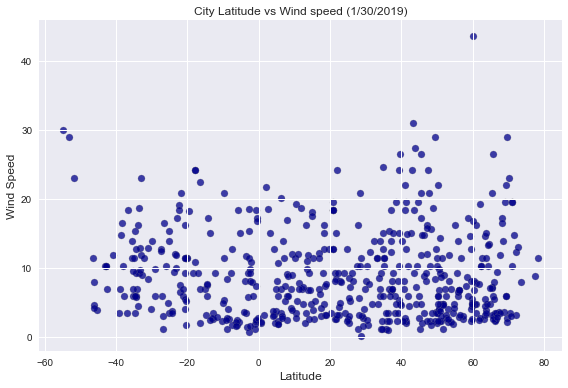

In [9]:

x = weather_data['Wind speed']

#Plot chart
plt.style.use('seaborn')
plt.scatter(weather_data['Lat'], x, s = 50, color = 'darkblue', edgecolor = 'grey', alpha = .75)

# Reference lines
for i in list(np.arange(0, 50, 10)):
    plt.axhline(i,linewidth=1, color='white')
for i in list(np.arange(-60, 81, 20)):    
    plt.axvline(i,linewidth=1, color='white')
    
#Titles
plt.xlabel('Latitude',size=12)
plt.ylabel('Wind Speed',size=12)
plt.title('City Latitude vs Wind speed (1/30/2019)',size =12)
plt.tight_layout()

plt.savefig("Images/wind.png")